### Created By :- Faldu jay
#### Email :- jay.faldu928@gmail.com

# Summer Analytics 2020 Capstone Project
## Predicting Employee Attrition in the Dawn of Recession

        
       As the COVID-19 keeps unleashing its havoc, the world continues to get pushed into the crisis of the great economic recession, more and more companies start to cut down their underperforming employees. Companies firing hundreds and thousands of Employees is a typical headline today. Cutting down employees or reducing an employee salary is a tough decision to take. It needs to be taken with utmost care as imprecision in the identification of employees whose performance is attriting may lead to sabotaging of both employees' career and the company's reputation in the market.

### Aim of The Competition
    To predict Employee Attrition by the given data about his/her past history.

In [1033]:
# importing required librery

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.pandas.set_option('display.max_columns',None)

### importing data

In [1034]:
data = pd.read_csv("train.csv")
data2 = pd.read_csv("test.csv")
data_y = data.Attrition
data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


In [1035]:
data.shape

(1628, 29)

In [1036]:
data2.shape

(470, 28)

#   





## Explroratory Data Analysis



In [1037]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

In [1038]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       470 non-null    int64 
 1   Age                      470 non-null    int64 
 2   BusinessTravel           470 non-null    object
 3   Department               470 non-null    object
 4   DistanceFromHome         470 non-null    int64 
 5   Education                470 non-null    int64 
 6   EducationField           470 non-null    object
 7   EmployeeNumber           470 non-null    int64 
 8   EnvironmentSatisfaction  470 non-null    int64 
 9   Gender                   470 non-null    object
 10  JobInvolvement           470 non-null    int64 
 11  JobRole                  470 non-null    object
 12  JobSatisfaction          470 non-null    int64 
 13  MaritalStatus            470 non-null    object
 14  MonthlyIncome            470 non-null    i

In [1039]:
data.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,2.761671,15.207617,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,2.549995,3.686703,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,1.000000,12.000000,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,2.000000,14.000000,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,4.000000,18.000000,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [1040]:
data = data.drop(['Id','Attrition','EmployeeNumber','Behaviour'],axis=1)
data2 = data2.drop(['Id','EmployeeNumber','Behaviour'],axis=1)

#   



### get info of every columns

In [1041]:
for column in data.columns:
    print(str(column) + str(' : ') + str(data[column].unique()))
    print(data[column].value_counts())
    print('____________________________________________________')
    print('')

Age : [30 36 55 39 37 31 32 33 35 21 60 29 40 34 41 38 45 44 26 54 23 50 46 42
 43 28 25 47 51 48 49 27 59 58 53 57 52 24 20 18 19 56 22]
31    92
29    85
35    80
34    73
30    70
26    68
32    65
33    60
28    58
36    55
37    53
40    52
41    52
25    47
38    47
24    46
27    42
39    41
46    40
42    38
45    37
50    36
44    34
47    31
21    30
55    29
20    27
49    26
43    24
19    23
51    22
53    22
48    16
52    16
23    16
58    15
22    13
18    13
54    11
56     9
59     8
57     3
60     3
Name: Age, dtype: int64
____________________________________________________

BusinessTravel : ['Non-Travel' 'Travel_Rarely' 'Travel_Frequently']
Travel_Rarely        1105
Travel_Frequently     403
Non-Travel            120
Name: BusinessTravel, dtype: int64
____________________________________________________

Department : ['Research & Development' 'Sales' 'Human Resources']
Research & Development    979
Sales                     568
Human Resources            81
Name: 

#   





## label encoding

In [558]:
catagory_col = [col for col in data.columns if data[col].dtype=='object']
catagory_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [559]:
# import librery for lable encoding

from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()

for column in catagory_col:
    data[column+'_n'] = l_encoder.fit_transform(data[column])
    data2[column+'_n'] = l_encoder.fit_transform(data2[column])
    data = data.drop([column],axis=1)
    data2 = data2.drop([column],axis=1)

#   





## One-hot Encoding

In [1042]:
temp = pd.get_dummies(data[catagory_col])
data = pd.concat([data,temp],axis=1)
data = data.drop(catagory_col,axis=1)

temp2 = pd.get_dummies(data2[catagory_col])
data2 = pd.concat([data2,temp2],axis=1)
data2 = data2.drop(catagory_col,axis=1)

In [1043]:
data.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,2,3,3,3,4,2564,0,14,3,0,12,2,11,7,6,7,4,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,36,12,4,3,3,3,4663,9,12,3,2,7,2,3,2,1,1,2,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,55,2,1,3,3,4,5160,4,16,3,0,12,3,9,7,7,3,5,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
3,39,24,1,1,3,4,4108,7,13,3,0,18,2,7,7,1,7,4,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4,37,3,3,3,3,3,9434,1,15,3,1,10,2,10,7,7,8,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [1044]:
data.shape

(1628, 46)

#  





## standerdizing data

In [916]:
# make set ofcolumn required standerdizing



In [917]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_arr = scaler.fit_transform(data)
data2_arr = scaler.fit_transform(data2)

data = pd.DataFrame(data_arr,columns = data.columns)
data2 = pd.DataFrame(data2_arr,columns = data2.columns)

In [918]:
data.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,-0.595595,-0.931510,0.113197,0.314514,0.474809,1.241465,-0.742636,-1.083343,-0.327661,-0.428952,-0.800724,0.274172,-0.584370,0.829018,0.972745,1.259309,0.987149,0.613667,3.544949,-0.573567,-1.453551,-0.228822,0.8142,-0.732017,-0.15871,-0.787338,-0.371034,1.457656,-0.234707,-0.332423,1.255368,-1.255368,-0.269191,-0.21511,2.061944,-0.241904,-0.283358,-0.172418,-0.514740,-0.537582,-0.343703,-0.491732,-0.848005,1.258621,0.792465,-0.792465
1,0.037391,0.272729,1.093440,0.314514,0.474809,0.329002,-0.258768,2.447160,-0.870318,-0.428952,1.512637,-0.394220,-0.584370,-0.522482,-0.464044,-0.334406,-0.730427,-0.806447,-0.282091,-0.573567,0.687970,-0.228822,0.8142,-0.732017,-0.15871,1.270103,-0.371034,-0.686033,-0.234707,-0.332423,1.255368,-1.255368,-0.269191,-0.21511,-0.484979,-0.241904,3.529100,-0.172418,-0.514740,-0.537582,-0.343703,-0.491732,1.179238,-0.794520,-1.261886,1.261886
2,2.041847,-0.931510,-1.847287,0.314514,0.474809,1.241465,-0.144198,0.485769,0.214996,-0.428952,-0.800724,0.274172,0.192246,0.491143,0.972745,1.578052,-0.157902,1.323724,-0.282091,-0.573567,0.687970,-0.228822,-1.2282,1.366088,-0.15871,-0.787338,-0.371034,1.457656,-0.234707,-0.332423,-0.796579,0.796579,-0.269191,-0.21511,-0.484979,-0.241904,-0.283358,-0.172418,-0.514740,1.860181,-0.343703,-0.491732,-0.848005,1.258621,0.792465,-0.792465
3,0.353884,1.717817,-1.847287,-1.463364,0.474809,1.241465,-0.386708,1.662604,-0.598989,-0.428952,-0.800724,1.076243,-0.584370,0.153268,0.972745,-0.334406,0.987149,0.613667,-0.282091,-0.573567,0.687970,-0.228822,0.8142,-0.732017,-0.15871,1.270103,-0.371034,-0.686033,-0.234707,-0.332423,-0.796579,0.796579,-0.269191,-0.21511,-0.484979,-0.241904,-0.283358,-0.172418,1.942728,-0.537582,-0.343703,-0.491732,-0.848005,1.258621,0.792465,-0.792465
4,0.142888,-0.811087,0.113197,0.314514,0.474809,0.329002,0.841058,-0.691065,-0.056332,-0.428952,0.355956,0.006815,-0.584370,0.660081,0.972745,1.578052,1.273412,-1.516504,-0.282091,-0.573567,0.687970,-0.228822,0.8142,-0.732017,-0.15871,-0.787338,-0.371034,-0.686033,4.260627,-0.332423,-0.796579,0.796579,-0.269191,-0.21511,-0.484979,-0.241904,3.529100,-0.172418,-0.514740,-0.537582,-0.343703,-0.491732,1.179238,-0.794520,0.792465,-0.792465


In [919]:
data.shape

(1628, 46)

#   





## outlier detection

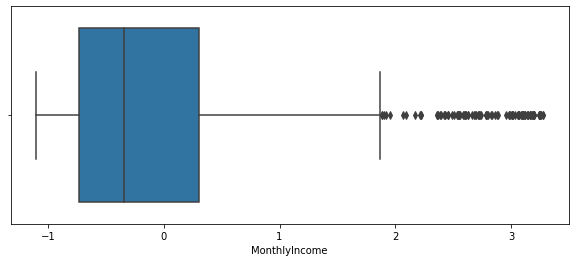

In [821]:
plt.subplots(figsize=(10,4))
sns.boxplot(x=data.MonthlyIncome)

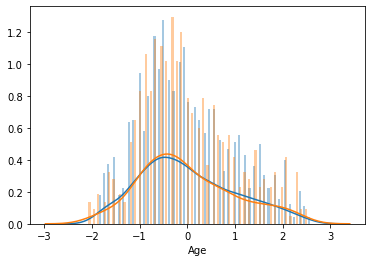

In [822]:
sns.distplot(data.Age,bins=100)
sns.distplot(data2.Age,bins=100)

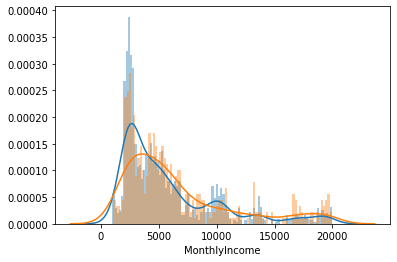

In [718]:
sns.distplot(data.MonthlyIncome,bins=100)
sns.distplot(data2.MonthlyIncome,bins=100)

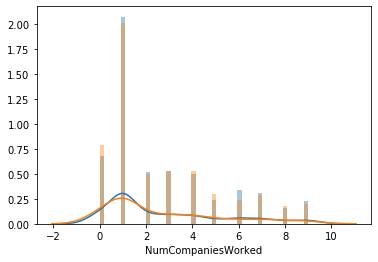

In [719]:
sns.distplot(data.NumCompaniesWorked,bins=50)
sns.distplot(data2.NumCompaniesWorked,bins=50)

In [726]:
## remove sample with monthly income more then 2
outlier_sample =[]
for income,index in zip(data.MonthlyIncome,data.index):
    if(income > 18000):
        outlier_sample.append(index)

In [727]:
outlier_sample

[43,
 90,
 102,
 165,
 169,
 209,
 219,
 225,
 279,
 280,
 285,
 286,
 289,
 299,
 339,
 350,
 355,
 357,
 362,
 368,
 439,
 445,
 453,
 466,
 471,
 478,
 528,
 547,
 588,
 593,
 698,
 707,
 711,
 745,
 755,
 756,
 806,
 842,
 850,
 886,
 891,
 895,
 932,
 940,
 960,
 1047,
 1135,
 1205,
 1281,
 1323,
 1461,
 1492,
 1534]

In [728]:
data = data.drop(outlier_sample,axis=0)

In [739]:
data_y = data_y.drop(outlier_sample,axis=0)

In [740]:
data.shape

(1575, 46)

#   






## Select Important Features

In [1045]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
feature = ExtraTreesClassifier()
feature.fit(data,data_y)

score = feature.feature_importances_
score

array([0.03789837, 0.03333895, 0.02456351, 0.03388193, 0.02727333,
       0.03916646, 0.03627255, 0.02927552, 0.02738088, 0.01236926,
       0.03346882, 0.03439233, 0.02499573, 0.03290628, 0.03574713,
       0.02532691, 0.0313491 , 0.03027503, 0.00824085, 0.02169937,
       0.01514751, 0.00452815, 0.01475885, 0.0140307 , 0.00242812,
       0.01938102, 0.00939961, 0.01840114, 0.00691001, 0.01615674,
       0.01992129, 0.01743853, 0.01260687, 0.00432084, 0.0166054 ,
       0.00799744, 0.01316723, 0.00687246, 0.01429686, 0.0127462 ,
       0.01825903, 0.01347451, 0.01804517, 0.02529422, 0.04519439,
       0.05279535])

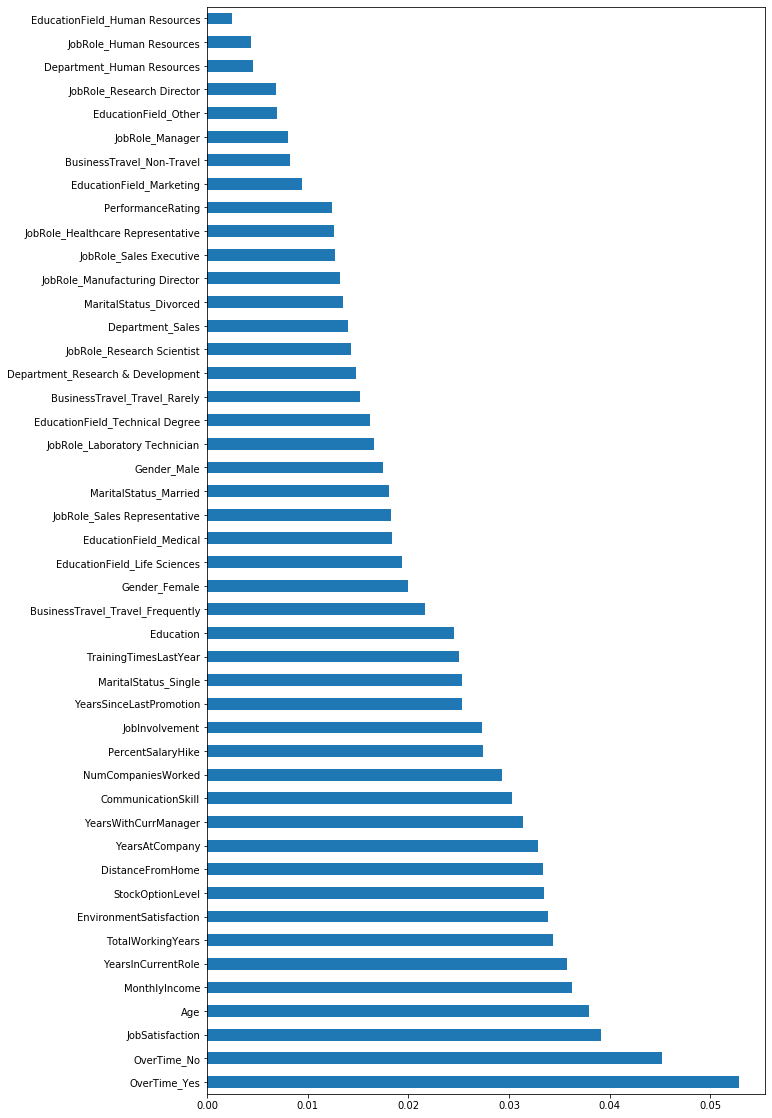

In [1046]:
feat_score = pd.Series(score, index=data.columns).sort_values(ascending = False)

plt.figure(figsize=(10,20))
feat_score.plot(kind='barh')
plt.show()

In [1047]:
feat_score

OverTime_Yes                         0.052795
OverTime_No                          0.045194
JobSatisfaction                      0.039166
Age                                  0.037898
MonthlyIncome                        0.036273
YearsInCurrentRole                   0.035747
TotalWorkingYears                    0.034392
EnvironmentSatisfaction              0.033882
StockOptionLevel                     0.033469
DistanceFromHome                     0.033339
YearsAtCompany                       0.032906
YearsWithCurrManager                 0.031349
CommunicationSkill                   0.030275
NumCompaniesWorked                   0.029276
PercentSalaryHike                    0.027381
JobInvolvement                       0.027273
YearsSinceLastPromotion              0.025327
MaritalStatus_Single                 0.025294
TrainingTimesLastYear                0.024996
Education                            0.024564
BusinessTravel_Travel_Frequently     0.021699
Gender_Female                     

In [1125]:
top_feature = list(feat_score.index[0:29])
top_feature

['OverTime_Yes',
 'OverTime_No',
 'JobSatisfaction',
 'Age',
 'MonthlyIncome',
 'YearsInCurrentRole',
 'TotalWorkingYears',
 'EnvironmentSatisfaction',
 'StockOptionLevel',
 'DistanceFromHome',
 'YearsAtCompany',
 'YearsWithCurrManager',
 'CommunicationSkill',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'JobInvolvement',
 'YearsSinceLastPromotion',
 'MaritalStatus_Single',
 'TrainingTimesLastYear',
 'Education',
 'BusinessTravel_Travel_Frequently',
 'Gender_Female',
 'EducationField_Life Sciences',
 'EducationField_Medical',
 'JobRole_Sales Representative',
 'MaritalStatus_Married',
 'Gender_Male',
 'JobRole_Laboratory Technician',
 'EducationField_Technical Degree']

In [1126]:
data_imp = data[top_feature]
data2_imp = data2[top_feature]

In [1127]:
data_imp.shape

(1628, 29)

In [1128]:
data2_imp.shape

(470, 29)

#    





## test-train split

In [1129]:
# train test split

from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test = tts(data_imp,data_y,test_size=0.3,random_state=4)

In [1130]:
x_train.shape

(1139, 29)

In [1131]:
x_test.shape

(489, 29)

#  





## Random Forest Classification

In [1132]:
from sklearn.ensemble import RandomForestClassifier as RFS

In [1141]:
model = RFS(random_state=24,n_estimators=250,max_depth=20)

#model.fit(x_train,y_train)

model.fit(data_imp,data_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=24, verbose=0,
                       warm_start=False)

In [1142]:
y_predict_1 = model.predict(x_test)
y_predict_2 = model.predict(data_imp)

In [1143]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_predict_1)

1.0

In [1144]:
roc_auc_score(data_y,y_predict_2)

1.0

In [1145]:
y_prob = model.predict_proba(data2_imp)
y_prob = list(y_prob[:,1])
data2_predict = model.predict(data2_imp)
data2_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1146]:
Id = np.arange(1,len(y_prob)+1)

Id = list(Id)

In [1147]:
ans = pd.DataFrame(list(zip(Id,y_prob)),columns=['Id','Attrition'])
ans

,Id,Attrition
0,1,0.092
1,2,0.024
2,3,0.100
3,4,0.228
4,5,0.068
...,...,...
465,466,0.348
466,467,0.808
467,468,0.424
468,469,0.092


In [1148]:
ans.to_csv('answer4.csv',index=False)